# **DS 5110 IDMP Project Spring 2025**

## **Exploring Crime Dynamics in Chicago: Patterns, Trends, and Insights**

Crime remains a persistent challenge in urban environments, with patterns often influenced by complex temporal and spatial factors. Understanding when and where crimes are likely to occur is critical for improving public safety, optimizing law enforcement resource allocation, and developing data-driven prevention strategies. In this project, we analyze crime data from the city of Chicago to explore underlying patterns in criminal activity. Specifically, we investigate two central hypotheses:

**Hypothesis 1:** Daily crime counts in Chicago exhibit predictable temporal dynamics that can be effectively modeled using historical trends and time-dependent features such as arrest rates, domestic incident ratios, time of day, and calendar effects like day of week and month.

**Hypothesis 2:** Criminal activity in Chicago exhibits spatial concentration rather than random distribution, forming distinct geographic clusters characterized by dominant crime types and localized behavioral patterns.

By validating these hypotheses, we aim to uncover actionable insights that can support informed decision-making for crime prevention and policy formulation.

**Team Members:**

*   Aishwarya Umesh Honap
*   Elif-Selma Yilmaz
*   Rohit Sisir Sahoo



### Loading Packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import calendar
import seaborn as sns
%matplotlib inline

### Loading Dataset

**Download the Dataset from the API:**

uncomment the below code and run to download the chicago crimes data

OR

**Download the data from One Drive**:

[chicago_crimes_2018_2025.csv](https://northeastern-my.sharepoint.com/:x:/g/personal/sahoo_ro_northeastern_edu/ESxGC3oVmaxKm8EOvMe68QwBsbUntDwv0q1agKqREQZQow?e=RTTHC)


In [ ]:
# import requests
# import pandas as pd

# api_url = "https://data.cityofchicago.org/resource/crimes.json?$limit=1600000&$offset=1"
# try:
#     response = requests.get(api_url)
#     response.raise_for_status()

#     data = response.json()


#     df = pd.DataFrame(data)
#     print(df.head())

# except requests.exceptions.RequestException as e:
#     print(f"Error fetching data: {e}")
# except ValueError as e:
#     print(f"Error decoding JSON data: {e}")
# except KeyError as e:
#     print(f"Error accessing data: {e}")
# except Exception as e:
#     print(f"An unexpected error occurred: {e}")

# try:
#     df.to_csv('chicago_crimes_2018_2025.csv', index=False)
#     print("DataFrame successfully exported to chicago_crimes.csv")

# except Exception as e:
#     print(f"An error occurred while exporting the DataFrame: {e}")

In [7]:
crime_data = pd.read_csv('/content/chicago_crimes_2018_2025.csv')
crime_data.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58,:@computed_region_8hcu_yrd4
0,13791980,JJ201451,2025-03-31T00:00:00.000,013XX N SEDGWICK ST,1822,NARCOTICS,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,STREET,True,False,...,"{'latitude': '41.907360089', 'longitude': '-87...",41.0,14926.0,37.0,309.0,46.0,54.0,14.0,198.0,27.0
1,13792319,JJ200756,2025-03-31T00:00:00.000,106XX S STATE LINE RD,0930,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,False,False,...,"{'latitude': '41.70171577', 'longitude': '-87....",47.0,21202.0,NaN,715.0,NaN,NaN,NaN,NaN,NaN
2,13791633,JJ201130,2025-03-31T00:00:00.000,050XX S BLACKSTONE AVE,0580,STALKING,SIMPLE,SCHOOL - PUBLIC GROUNDS,False,False,...,"{'latitude': '41.803651024', 'longitude': '-87...",1.0,21192.0,5.0,400.0,10.0,10.0,24.0,113.0,9.0
3,13791800,JJ201267,2025-03-31T00:00:00.000,044XX S WELLS ST,0460,BATTERY,SIMPLE,STREET,False,False,...,"{'latitude': '41.814097571', 'longitude': '-87...",12.0,14924.0,3.0,189.0,9.0,37.0,23.0,106.0,20.0
4,13791691,JJ201135,2025-03-31T00:00:00.000,001XX W 63RD ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,"{'latitude': '41.779997323', 'longitude': '-87...",53.0,21559.0,66.0,166.0,4.0,11.0,18.0,251.0,20.0


### Understanding the data

In [8]:
crime_data.shape

(1600000, 31)

### Tidying the Data

**1. Handle Missing and Infinite Values**

In [9]:
crime_data.dropna(inplace=True)

In [10]:
# remove infinities
crime_data.replace([np.inf, -np.inf], np.nan, inplace=True)
crime_data.dropna(inplace=True)

**2. Remove Duplicates**

In [11]:
# remove duplicates
crime_data.drop_duplicates(inplace=True)

**3. Convert Date Column to Datetime**

In [12]:
# Group crimes by location and time to analyze hotspot dynamics
crime_data['date'] = pd.to_datetime(crime_data['date'])

In [13]:
# Extract year, month, day, hour, and minute information
crime_data['Year'] = crime_data['date'].dt.year
crime_data['Month'] = crime_data['date'].dt.month
crime_data['Day'] = crime_data['date'].dt.day
crime_data['Hour'] = crime_data['date'].dt.hour
crime_data['Minute'] = crime_data['date'].dt.minute

**4. Create Time-of-Day Category**

In [14]:
# Define time-of-day categories
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

crime_data['Time_of_Day'] = crime_data['Hour'].apply(get_time_of_day)


**5. Standardize Categorical Data**


In [15]:
# Standardize string categorical columns
crime_data['primary_type'] = crime_data['primary_type'].str.strip().str.lower()
crime_data['location_description'] = crime_data['location_description'].str.strip().str.lower()

**6. Drop Irrelevant Columns**

In [16]:
# Drop columns that are not useful for analysis
columns_to_drop = [':@computed_region_6mkv_f3dw', '@computed_region_awaf_s7ux',
       ':@computed_region_vrxf_vc4k', ':@computed_region_awaf_s7ux',
       ':@computed_region_bdys_3d7i', ':@computed_region_43wa_7qmu',
       ':@computed_region_rpca_8um6', ':@computed_region_d9mm_jgwp',
       ':@computed_region_d3ds_rm58', ':@computed_region_8hcu_yrd4']
crime_data.drop(columns=[col for col in columns_to_drop if col in crime_data.columns], inplace=True)


**7. Ensure Latitude and Longitude Are Numeric**

In [17]:
# Convert latitude and longitude to numeric (if not already), and drop NaNs
crime_data['latitude'] = pd.to_numeric(crime_data['latitude'], errors='coerce')
crime_data['longitude'] = pd.to_numeric(crime_data['longitude'], errors='coerce')
crime_data.dropna(subset=['latitude', 'longitude'], inplace=True)


**8. Selecting data from the past 7 years, including the current year (2019–2025)**


In [18]:
crime_data['date'] = pd.to_datetime(crime_data['date'])
crime_data = crime_data[(crime_data['Year'] >= 2019)]

**Data Check after tidying**

In [19]:
crime_data.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,updated_on,latitude,longitude,location,Year,Month,Day,Hour,Minute,Time_of_Day
0,13791980,JJ201451,2025-03-31,013XX N SEDGWICK ST,1822,narcotics,MANUFACTURE / DELIVER - CANNABIS OVER 10 GRAMS,street,True,False,...,2025-04-07T15:41:31.000,41.907360,-87.638477,"{'latitude': '41.907360089', 'longitude': '-87...",2025,3,31,0,0,Night
2,13791633,JJ201130,2025-03-31,050XX S BLACKSTONE AVE,0580,stalking,SIMPLE,school - public grounds,False,False,...,2025-04-07T15:41:31.000,41.803651,-87.590528,"{'latitude': '41.803651024', 'longitude': '-87...",2025,3,31,0,0,Night
3,13791800,JJ201267,2025-03-31,044XX S WELLS ST,0460,battery,SIMPLE,street,False,False,...,2025-04-07T15:41:31.000,41.814098,-87.632303,"{'latitude': '41.814097571', 'longitude': '-87...",2025,3,31,0,0,Night
4,13791691,JJ201135,2025-03-31,001XX W 63RD ST,0910,motor vehicle theft,AUTOMOBILE,street,False,False,...,2025-04-07T15:41:31.000,41.779997,-87.629196,"{'latitude': '41.779997323', 'longitude': '-87...",2025,3,31,0,0,Night
5,13791295,JJ200639,2025-03-31,036XX W 26TH ST,0496,battery,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,apartment,True,True,...,2025-04-07T15:41:31.000,41.844377,-87.715397,"{'latitude': '41.844377423', 'longitude': '-87...",2025,3,31,0,0,Night


In [20]:
crime_data.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Time_of_Day'],
      dtype='object')

In [21]:
crime_data.dtypes

,0
id,int64
case_number,object
date,datetime64[ns]
block,object
iucr,object
primary_type,object
description,object
location_description,object
arrest,bool
domestic,bool


In [22]:
crime_data.shape

(1462113, 28)

##Visualisations

**Temporal Distribution of Top Crime Types**

To understand how criminal activity varies throughout the day, we examine the distribution of the top 10 most frequent crime types across different time periods. By segmenting the day into four parts:

* Morning (5 AM – 12 PM)

* Afternoon (12 PM – 5 PM)

* Evening (5 PM – 9 PM)

* Night (9 PM – 5 AM)

we can uncover patterns in when different types of crimes are most likely to occur. This analysis provides insight into the temporal behavior of criminal activity in Chicago, which can be valuable for law enforcement planning and resource deployment.



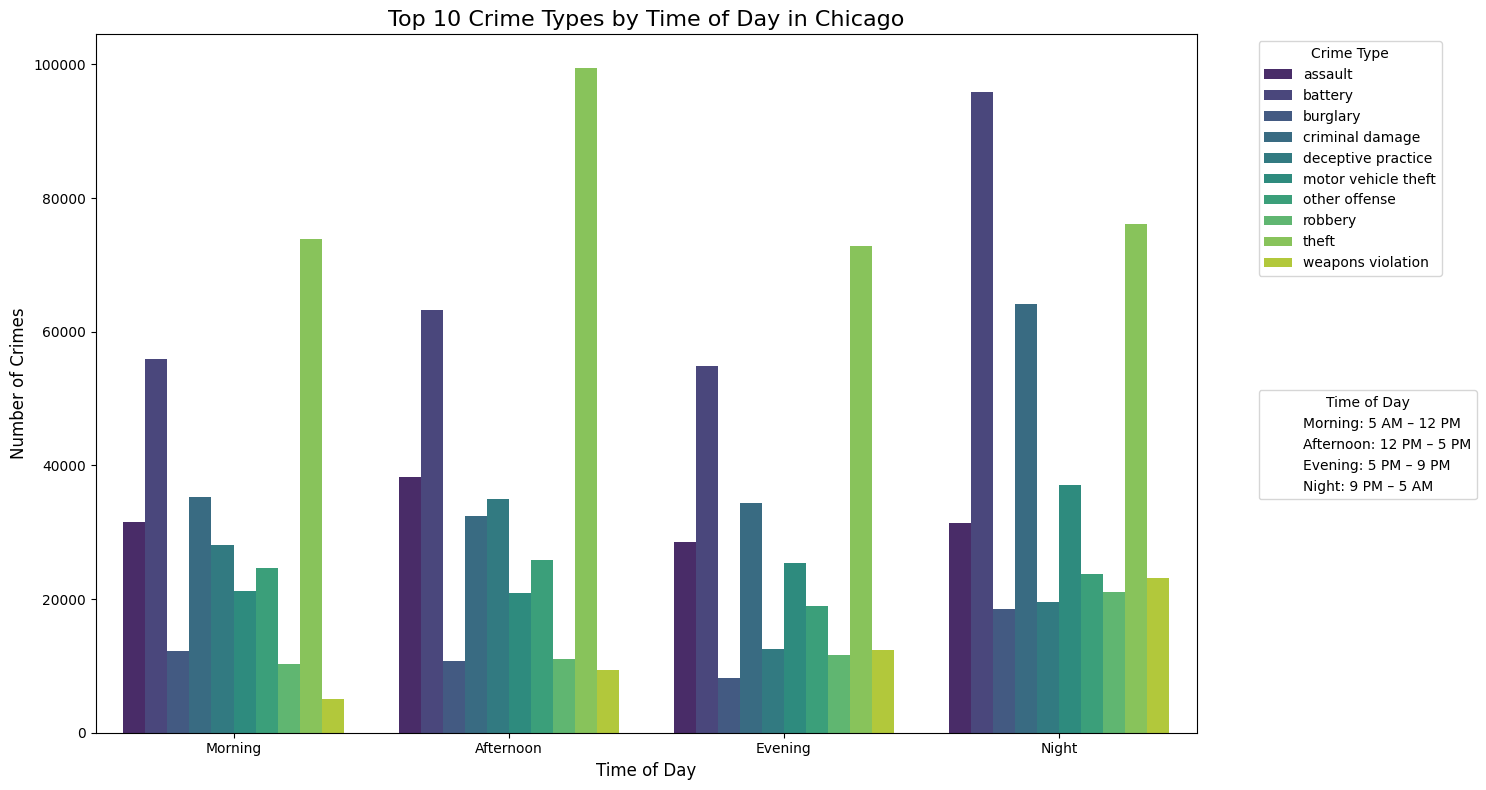

In [25]:
crime_counts = crime_data.groupby(['Time_of_Day', 'primary_type']).size().reset_index(name='Counts')

top_10_crimes = crime_data['primary_type'].value_counts().nlargest(10).index

top_crime_counts = crime_counts[crime_counts['primary_type'].isin(top_10_crimes)]

time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

plt.figure(figsize=(15, 8))
barplot = sns.barplot(
    x='Time_of_Day',
    y='Counts',
    hue='primary_type',
    data=top_crime_counts,
    palette='viridis',
    order=time_order
)

plt.title('Top 10 Crime Types by Time of Day in Chicago', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

crime_legend = plt.legend(
    title='Crime Type',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10
)

time_legend_labels = {
    'Morning': '5 AM – 12 PM',
    'Afternoon': '12 PM – 5 PM',
    'Evening': '5 PM – 9 PM',
    'Night': '9 PM – 5 AM'
}

time_legend_patches = [
    Patch(facecolor='none', edgecolor='none', label=f"{k}: {v}")
    for k, v in time_legend_labels.items()
]

time_legend = plt.legend(
    handles=time_legend_patches,
    title='Time of Day',
    bbox_to_anchor=(1.05, 0.5),
    loc='upper left',
    fontsize=10
)

plt.gca().add_artist(crime_legend)
plt.tight_layout()
plt.show()

**Key Takeaways:**
1. Crime type distribution shifts across different times of the day
2. Crime frequency peaks in the afternoon and night


**Understanding Where Crimes Happen: Yearly Patterns**

To better understand how crime trends have shifted across different environments, we analyze the top 10 most common locations where crimes occurred. Since the data for 2025 only covers the first three months, we exclude it from this analysis to maintain consistency across years. By comparing location-based crime counts from 2019 to 2024, we can observe changes in crime frequency across settings such as streets, residences, and public spaces, providing insight into how criminal activity is distributed spatially over time.



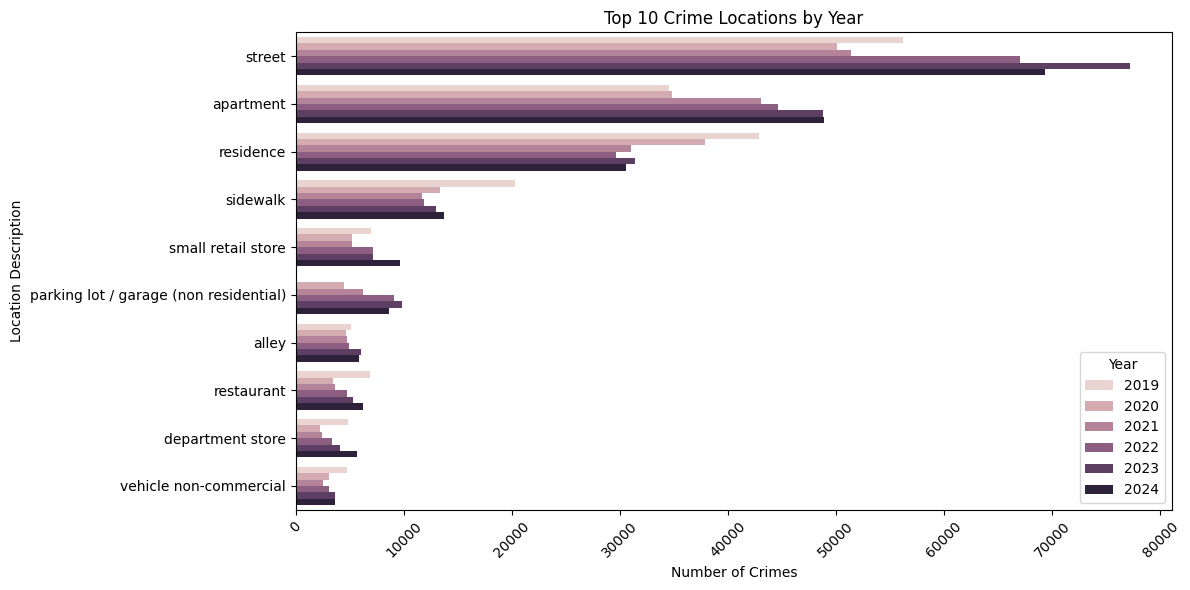

In [26]:
# Filter out the year 2025 as 2025 has data until just March
filtered_data = crime_data[crime_data['Year'] != 2025]

# Get the top 10 locations
top_locations = filtered_data['location_description'].value_counts().nlargest(10).index

# Filter the data for the top 10 locations
top_location_data = filtered_data[filtered_data['location_description'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.countplot(y='location_description', hue='Year', data=top_location_data, order=top_locations)
plt.title('Top 10 Crime Locations by Year')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Takeaways:**
1. High-crime areas stay consistent, showing persistent location trends
2. Some locations show year-to-year variation, reflecting local crime shifts


**Exploring Seasonal Trends & Arrest Disparities**


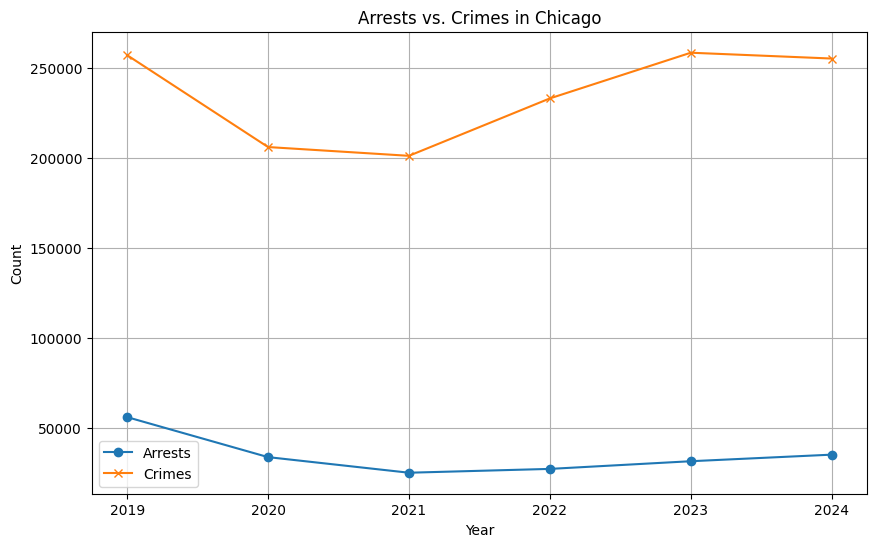

In [27]:
# Filter out the year 2025
filtered_data = crime_data[crime_data['Year'] != 2025]

# Group data by year and count arrests
arrest_counts_by_year = filtered_data.groupby('Year')['arrest'].sum().reset_index()

# Group data by year and count crimes
crime_counts_by_year = filtered_data.groupby('Year').size().reset_index(name='crime_count')

merged_data = pd.merge(arrest_counts_by_year, crime_counts_by_year, on='Year')

plt.figure(figsize=(10, 6))
plt.plot(merged_data['Year'], merged_data['arrest'], label='Arrests', marker='o')
plt.plot(merged_data['Year'], merged_data['crime_count'], label='Crimes', marker='x')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Arrests vs. Crimes in Chicago')
plt.legend()
plt.grid(True)
plt.show()


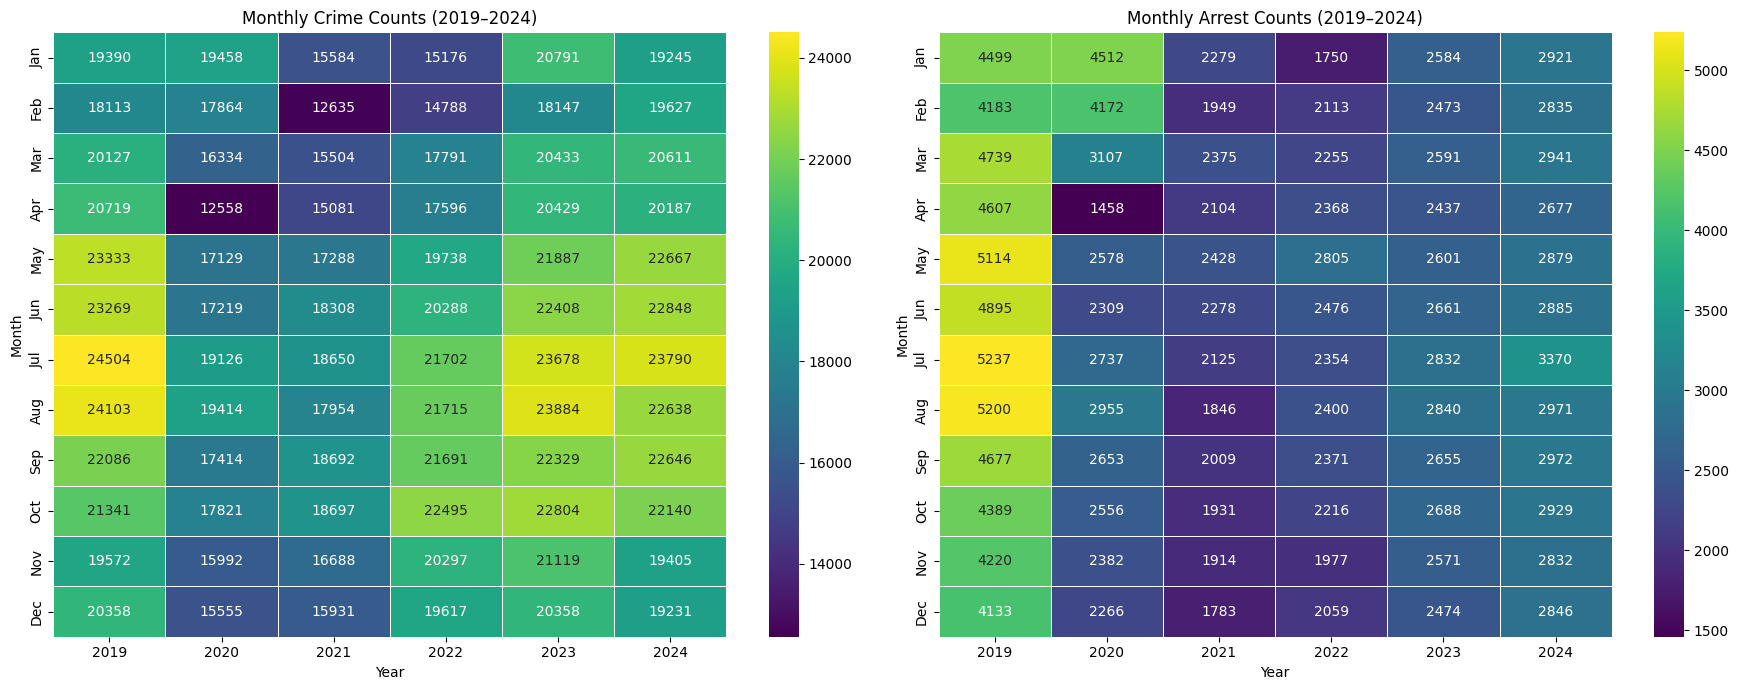

In [25]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Remove data for 2025 since it's incomplete
crime_data_filtered = crime_data[crime_data['Year'] != 2025]

# Total arrests by Year and Month
arrests_count = (
    crime_data_filtered.groupby(['Year', 'Month'])['arrest']
    .sum()
    .reset_index(name='Total_Arrests')
)

# Total crimes by Year and Month
crimes_count = (
    crime_data_filtered.groupby(['Year', 'Month'])
    .size()
    .reset_index(name='Total_Crimes')
)

# Convert month number to abbreviated month name
arrests_count['Month'] = arrests_count['Month'].apply(lambda x: calendar.month_abbr[x])
crimes_count['Month'] = crimes_count['Month'].apply(lambda x: calendar.month_abbr[x])

# Define month order for consistent display
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

arrests_pivot = (
    arrests_count.pivot(index='Month', columns='Year', values='Total_Arrests')
    .reindex(month_order)
    .fillna(0)
    .astype(int)
)

crimes_pivot = (
    crimes_count.pivot(index='Month', columns='Year', values='Total_Crimes')
    .reindex(month_order)
    .fillna(0)
    .astype(int)
)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Crimes heatmap
sns.heatmap(crimes_pivot, annot=True, fmt='d', cmap='viridis', linewidths=0.5, ax=axes[0])
axes[0].set_title("Monthly Crime Counts (2019–2024)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Month")

# Arrests heatmap
sns.heatmap(arrests_pivot, annot=True, fmt='d', cmap='viridis', linewidths=0.5, ax=axes[1])
axes[1].set_title("Monthly Arrest Counts (2019–2024)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Month")

plt.tight_layout()
plt.show()


**Key Takeaways:**
1. Crime rates show clear seasonal patterns
2. Persistent gap between crimes reported and arrests made


**Extra Visualizations to understand data:**

**Arrest vs. Non-Arrest Rate by Primary Crime Type**

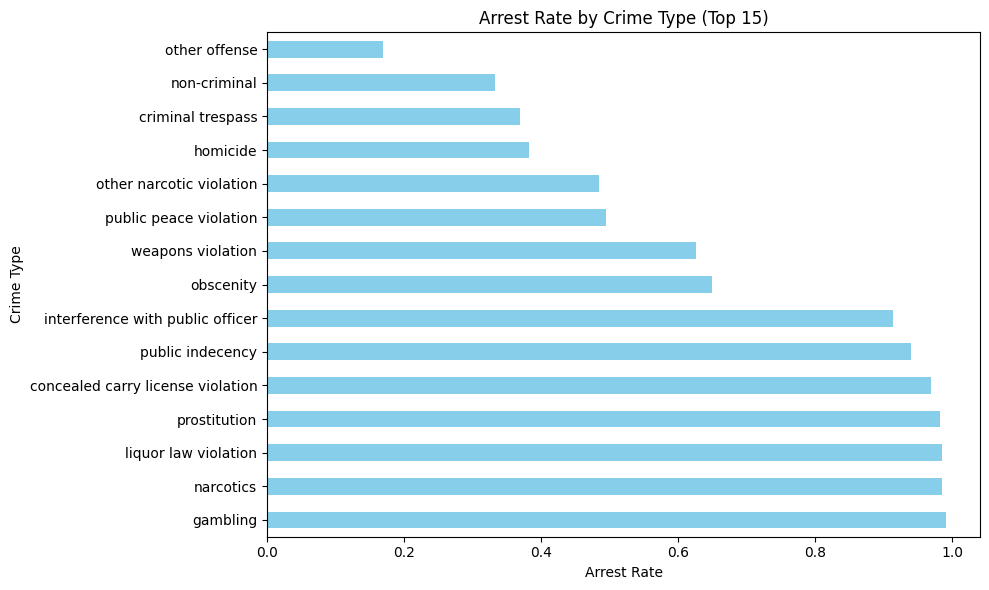

In [28]:
arrest_ratio = crime_data.groupby('primary_type')['arrest'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
arrest_ratio.plot(kind='barh', color='skyblue')
plt.title('Arrest Rate by Crime Type (Top 15)')
plt.xlabel('Arrest Rate')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()


**Observations:**

This chart highlights crime types with the highest likelihood of resulting in an arrest. Several key observations:

1. Gambling, narcotics, and prostitution have arrest rates close to 100%, likely due to proactive enforcement operations or direct police involvement.

2. Public order violations like liquor law and public indecency also show very high arrest rates.

3. On the lower end, crimes like "other offense" and "non-criminal" incidents result in far fewer arrests.

4. The disparity suggests that some crimes are easier to enforce or more often occur in the presence of law enforcement, while others are harder to act on or deprioritized.

This helps reveal enforcement patterns and which crimes tend to be more actionable from a policing standpoint.

**3. Domestic vs. Non-Domestic Crime by Year**

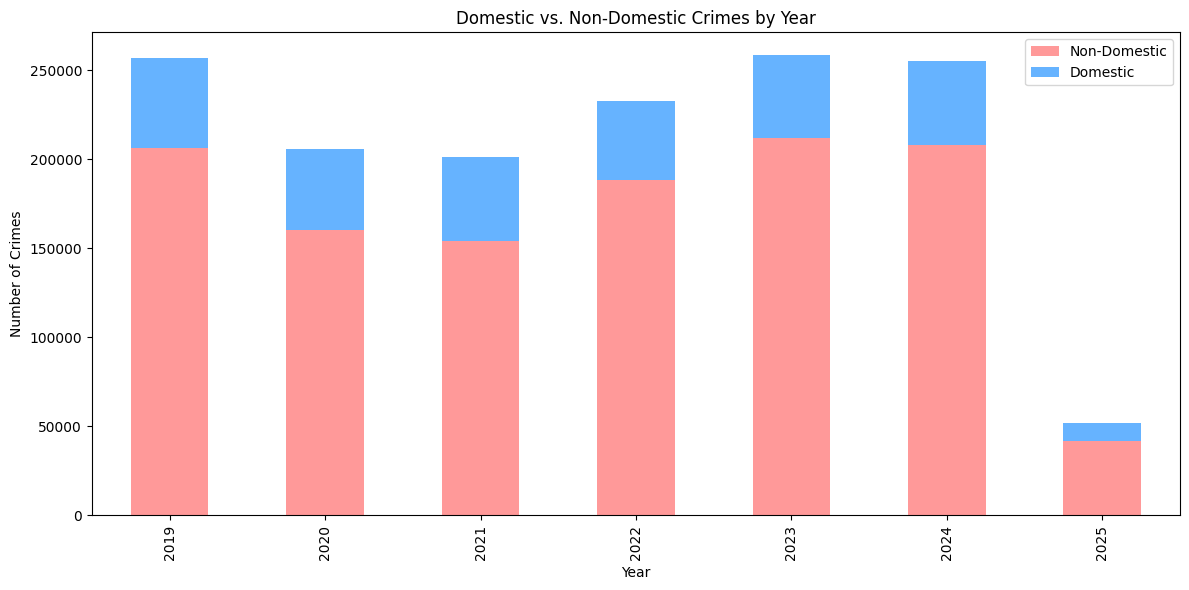

In [29]:
domestic_trend = crime_data.groupby(['Year', 'domestic']).size().unstack().fillna(0)

domestic_trend.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#ff9999','#66b3ff'])
plt.title('Domestic vs. Non-Domestic Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(['Non-Domestic', 'Domestic'])
plt.tight_layout()
plt.show()


**Observations:**

This stacked bar chart compares the volume of domestic and non-domestic crimes in Chicago over the years:

1. Non-domestic crimes make up the majority of reported cases each year.

2. Domestic crime counts have remained relatively stable, with a slight decline during the pandemic years (2020–2021).

3. The overall crime volume dropped in 2020–2021, likely reflecting the impact of COVID-19 lockdowns and social restrictions.

4. Data for 2025 is incomplete and includes only a few months, resulting in a significantly lower count.

This comparison highlights the need to consider both crime context and annual events when analyzing trends.

**4. Top 10 Community Areas by Crime Count**

<ipython-input-30-d511643ee54f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='coolwarm')


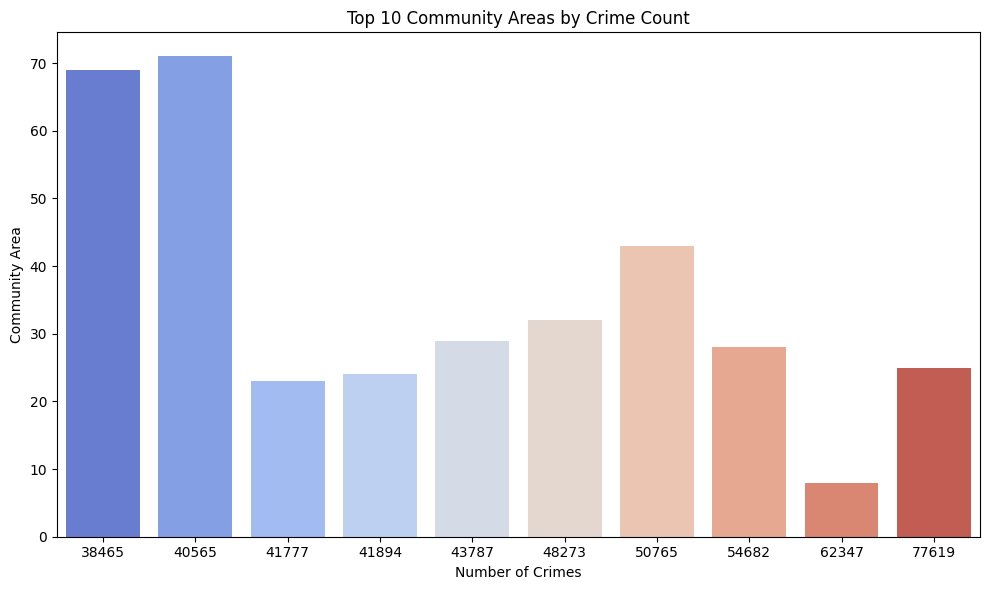

In [30]:
top_areas = crime_data['community_area'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_areas.values, y=top_areas.index, palette='coolwarm')
plt.title('Top 10 Community Areas by Crime Count')
plt.xlabel('Number of Crimes')
plt.ylabel('Community Area')
plt.tight_layout()
plt.show()


**Observations:**

This bar chart highlights the community areas in Chicago with the highest number of reported crimes:

1. A few community areas experience significantly higher crime volumes compared to others.

2. These hotspots can be prioritized for targeted safety interventions and deeper analysis.

3. The chart provides a high-level spatial perspective but would benefit from mapping these areas to their actual names for interpretability.

This spatial concentration supports the hypothesis that crime is not evenly distributed across the city but instead clusters in specific neighborhoods.

**Statistical visualizations**

**1. Distribution of Crime Count by Month**

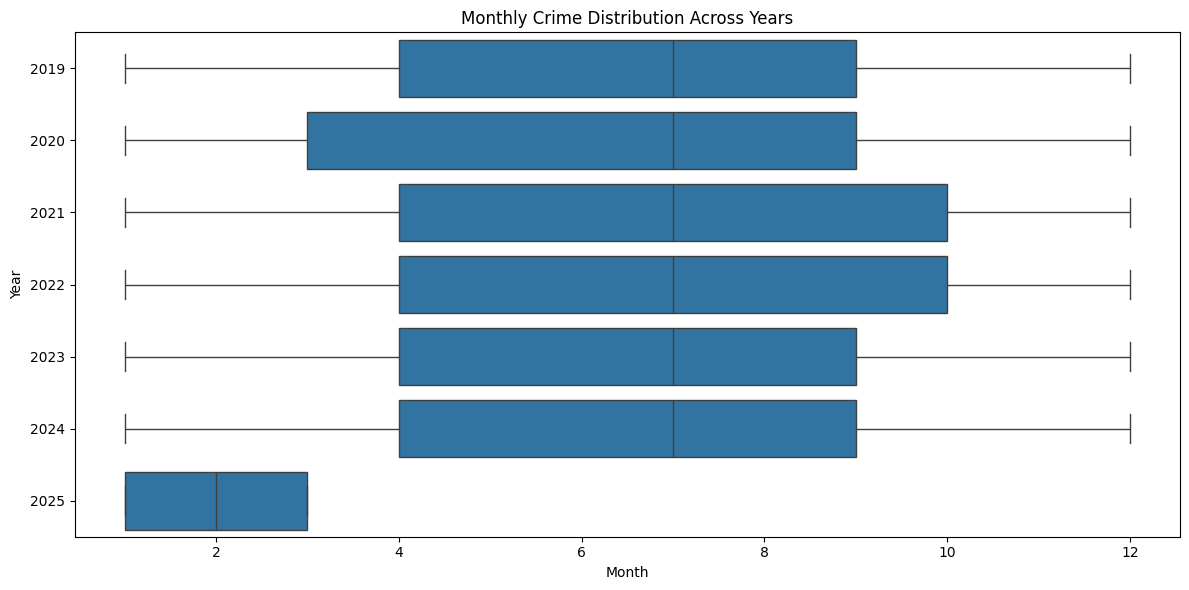

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=crime_data, x='Month', y='Year', orient='h')
plt.title('Monthly Crime Distribution Across Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

**Observations:**

1. For most years (2019–2024), crime is relatively evenly distributed across months, with no extreme outliers.

2. In 2020, there’s a slight shift in the distribution, possibly due to COVID-19 lockdowns impacting crime patterns in the early months.

3. 2025 shows data only up to March, which explains the narrow box and lower spread.


**2. Arrest Rate Distribution by Year**

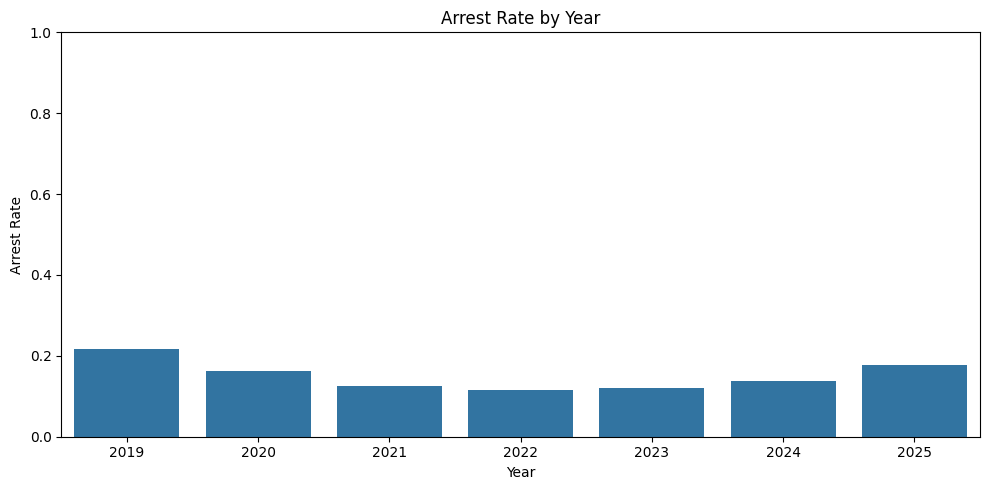

In [32]:
yearly_arrest_rate = crime_data.groupby('Year')['arrest'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_arrest_rate, x='Year', y='arrest')
plt.title('Arrest Rate by Year')
plt.xlabel('Year')
plt.ylabel('Arrest Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

**Observations:**

1. The arrest rate has declined steadily from 2019 to 2022, dropping from over 20% to around 12%.

2. A slight recovery is seen in 2023 and 2024, with a small uptick again in early 2025 (based on limited data).

The overall trend may reflect changes in policing practices, resource allocation, or case prioritization over time.

**3. Correlation Heatmap for the relationships between variables like hour, arrest, domestic**

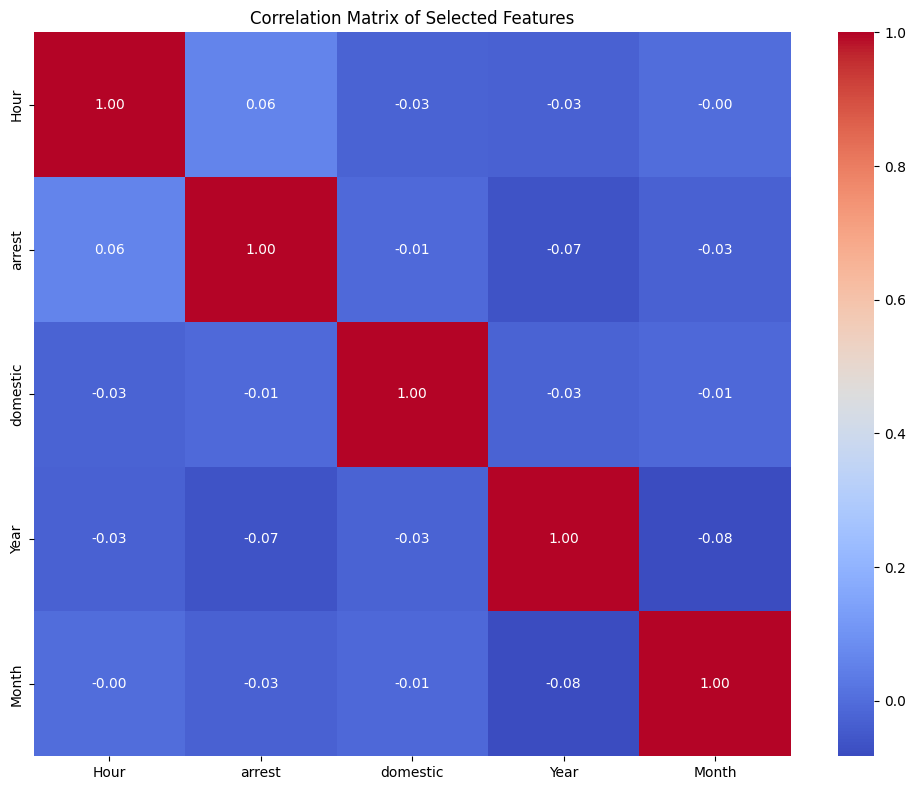

In [33]:
plt.figure(figsize=(10, 8))
corr = crime_data[['Hour', 'arrest', 'domestic', 'Year', 'Month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

**Observations:**

1. A slight positive correlation exists between hour and arrest (0.06), possibly reflecting peak enforcement times.

2. Arrest and year show a slightly negative correlation (–0.07), supporting the downward trend in arrest rates over time.

Overall, the features appear mostly independent, suggesting that more complex or nonlinear methods may be needed for predictive modeling.

**4. KDE Plot: Hourly Crime Density by Domestic vs Non-Domestic**

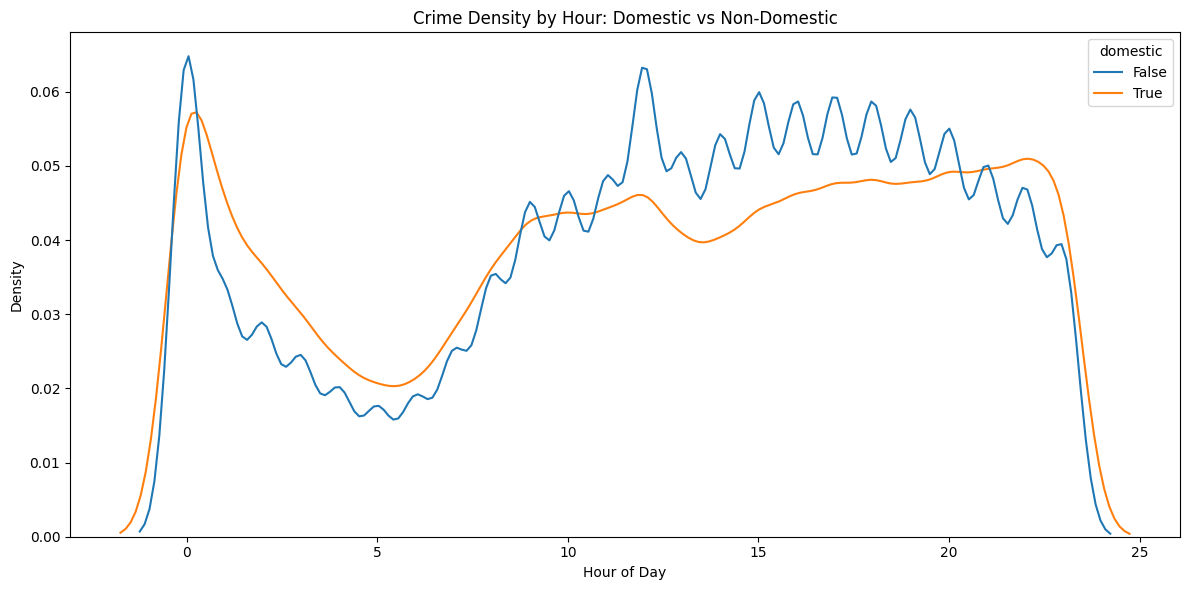

In [34]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=crime_data, x='Hour', hue='domestic', common_norm=False)
plt.title('Crime Density by Hour: Domestic vs Non-Domestic')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

**Observations:**
1. Domestic crimes (orange) are more evenly distributed throughout the day, with slight peaks around midnight and late evening.

2. Non-domestic crimes (blue) show sharper peaks around midnight and again in the afternoon to early evening, reflecting more concentrated timing.

This suggests that non-domestic crimes follow more specific activity patterns (e.g., business hours, nightlife), while domestic incidents occur more steadily across the day.



## **Hypothesis 1: Forecasting SARIMAX**



### 1. SARIMAX

Steps for Time Series Preparation:

1. Create a new column Crime_Date using the Year, Month, and Day fields.

2. Extract the day of the week from the original date column for future analysis.

3. Group the data by Crime_Date to calculate total crimes per day.

4. Plot the daily crime counts to visualize trends, seasonality, and irregularities over time.

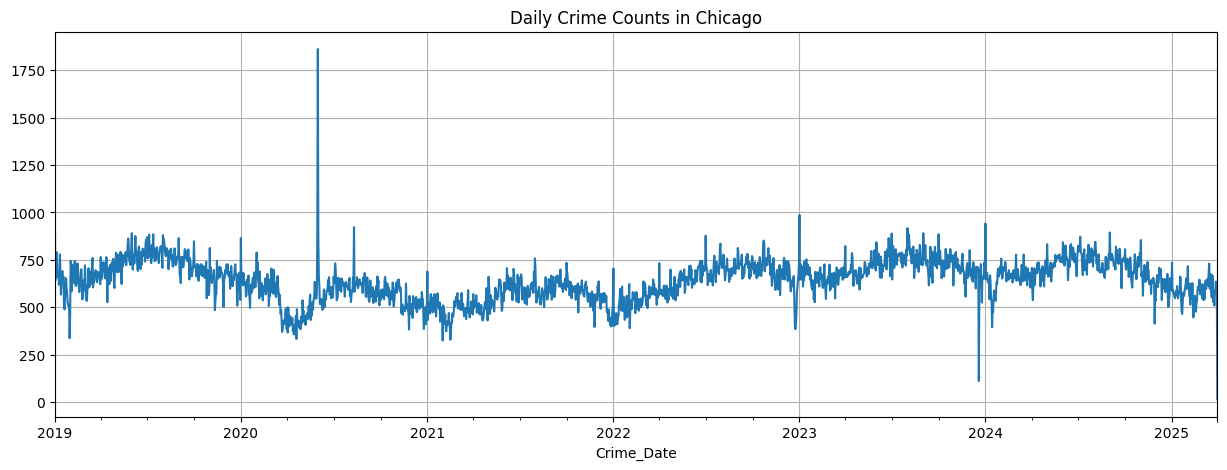

In [35]:
df = crime_data.copy()
df['Crime_Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['DayofWeek'] = df['date'].dt.day_name()
daily_counts = df.groupby('Crime_Date').size().rename('Crime_Count')
daily_counts.plot(figsize=(15,5), title="Daily Crime Counts in Chicago")
plt.grid()
plt.show()


**Observation:**
The daily crime trend appears generally stable with seasonal fluctuations.
However, there is a visible spike around mid-2020, indicating a potential outlier.

To remove noise caused by anomalies, we detect outliers in the daily crime counts using the IQR (Interquartile Range) method. We only consider full data from 2019 to 2024 to get a consistent baseline and calculate the lower and upper thresholds for identifying outliers.



In [38]:
# Filter to compute IQR only on 2019–2024
clip_range = daily_counts[(daily_counts.index >= '2019-01-01') & (daily_counts.index < '2025-01-01')]

#  Compute IQR
q1 = clip_range.quantile(0.25)
q3 = clip_range.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = daily_counts[(daily_counts < lower_bound) | (daily_counts > upper_bound)]

print(f"Outlier Thresholds:")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Total Outliers Detected: {len(outliers)}\n")

print("\nHigh Outliers:")
print(outliers[outliers > upper_bound].sort_values(ascending=False))

print("\nLow Outliers:")
print(outliers[outliers < lower_bound].sort_values())


Outlier Thresholds:
Lower Bound: 354.12
Upper Bound: 935.12
Total Outliers Detected: 10


High Outliers:
Crime_Date
2020-05-31    1861
2019-01-01    1004
2023-01-01     986
2024-01-01     941
Name: Crime_Count, dtype: int64

Low Outliers:
Crime_Date
2025-03-31     15
2023-12-19    110
2021-01-31    324
2021-02-15    328
2020-04-19    332
2019-01-30    336
Name: Crime_Count, dtype: int64


Once we have the outlier thresholds, we clip all values in the full time series (2019–2025) to stay within those bounds. This step smooths the series by reducing the effect of extreme highs and lows without dropping any days.


In [39]:
# Clip full daily_counts based on 2019–2024 IQR
daily_counts_clipped = daily_counts.clip(lower=lower_bound, upper=upper_bound)

# Map clipped values back to original df
df = df.merge(daily_counts_clipped.rename('Crime_Count_Clipped'), left_on='Crime_Date', right_index=True)
df['Crime_Count'] = df['Crime_Count_Clipped']
df.drop(columns=['Crime_Count_Clipped'], inplace=True)

We now visualize the updated time series after clipping. This smoothed series better represents the underlying crime trends and is more suitable for time series forecasting models like SARIMAX.

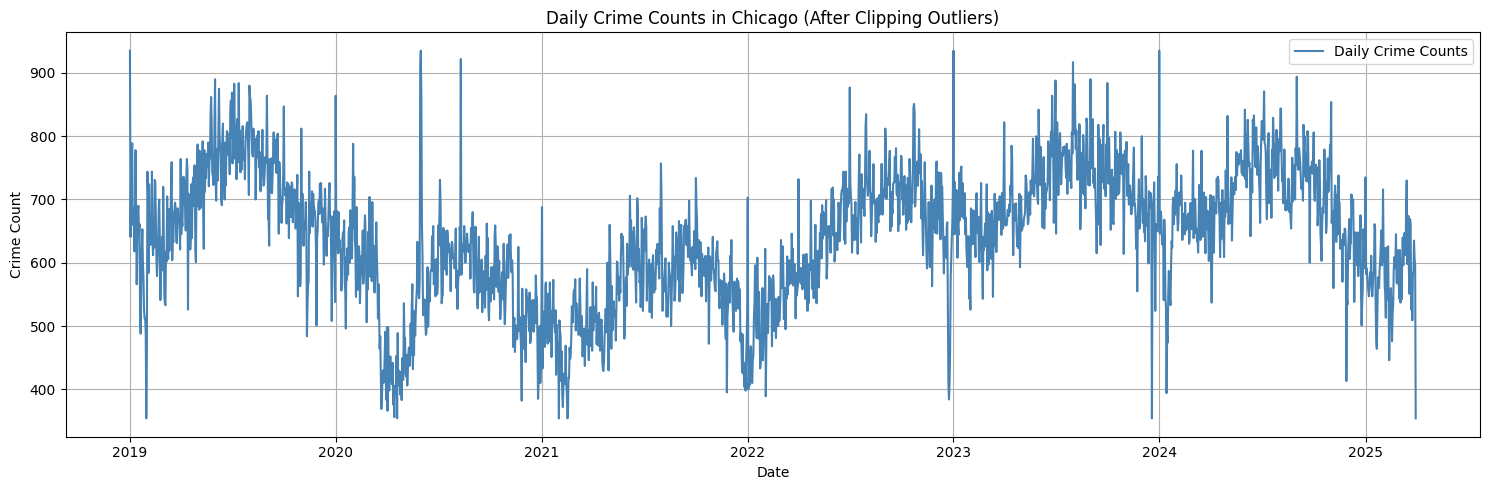

In [40]:
# Crime_Date is datetime and sorted
df = df.sort_values('Crime_Date')

plot_counts = df.groupby('Crime_Date')['Crime_Count'].first()

plt.figure(figsize=(15, 5))
plt.plot(plot_counts, color='steelblue', label='Daily Crime Counts')
plt.title("Daily Crime Counts in Chicago (After Clipping Outliers)")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Checking Stationarity with Augmented Dickey-Fuller Test:**

Before fitting a SARIMAX model, we need to verify if the time series is stationary to check its statistical properties like mean and variance do not change over time.

We use the Augmented Dickey-Fuller (ADF) test to check for stationarity.

A low p-value (typically < 0.05) indicates that the series is stationary and suitable for modeling without differencing.

In [41]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
result = adfuller(plot_counts.dropna())
print(f'ADF Statistic: {result[0]:.4f}')
print(f'p-value: {result[1]:.4f}')


ADF Statistic: -2.1333
p-value: 0.2313


The p-value is greater than 0.05, indicating that the time series is not stationary.
This suggests we need to difference the data before applying SARIMAX.

In [42]:
from statsmodels.tsa.stattools import adfuller

# First-order differencing
diffed_counts = plot_counts.diff().dropna()

# Re-run ADF test
result_diff = adfuller(diffed_counts)
print("\nAfter First Differencing:")
print(f"ADF Statistic: {result_diff[0]:.4f}")
print(f"p-value: {result_diff[1]:.4f}")



After First Differencing:
ADF Statistic: -14.5299
p-value: 0.0000


In [43]:
df.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Time_of_Day',
       'Crime_Date', 'DayofWeek', 'Crime_Count'],
      dtype='object')

**Column	and Why It’s Not Useful for exog:**

1. id, case_number ->	Unique identifiers
2. block, iucr, description, fbi_code, location_description ->	High-cardinality categorical and too noisy
3. location, x_coordinate, y_coordinate, latitude, longitude ->	Better used for clustering/geo heatmaps
4. updated_on, Minute -> Uninformative / too granular
5. beat, district, ward, community_area	-> Too many discrete values
6. primary_type	Categorical with many classes -> hard to encode meaningfully
7. Hour ->	Can vary too much day to day

**Column and Why It's Useful**
1. arrest	Binary -> use mean % per day
2. domestic	Binary -> use mean % per day
3. Time_of_Day ->	Has categories like Morning, Evening → encode
4. DayofWeek ->	Captures weekly pattern (Monday, Friday, etc.)
5. Month -> Captures seasonal trend (summer/winter variation)
6. Crime_Count -> Used as target, not as feature

In [44]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Hour'].apply(time_of_day)

# One-hot encode Time_of_Day
df = pd.concat([df, pd.get_dummies(df['Time_of_Day'], prefix='Time')], axis=1)

# Group and aggregate for exogenous features
daily_exog = df.groupby('Crime_Date').agg({
    'domestic': 'mean',
    'arrest': 'mean',
    'Time_Morning': 'mean',
    'Time_Afternoon': 'mean',
    'Time_Evening': 'mean',
    'Time_Night': 'mean',
    'DayofWeek': lambda x: x.mode()[0],
    'Month': lambda x: x.mode()[0]
}).fillna(0)

# One-hot encode Month and DayofWeek after aggregation
daily_exog = pd.get_dummies(daily_exog, columns=['Month', 'DayofWeek'], drop_first=True)


In [45]:
daily_exog.head()

,domestic,arrest,Time_Morning,Time_Afternoon,Time_Evening,Time_Night,Month_2,Month_3,Month_4,Month_5,...,Month_9,Month_10,Month_11,Month_12,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday
Crime_Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.278884,0.204183,0.229084,0.174303,0.137450,0.459163,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2019-01-02,0.198128,0.224649,0.180967,0.336973,0.260530,0.221529,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2019-01-03,0.179866,0.194631,0.256376,0.295302,0.210738,0.237584,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2019-01-04,0.166667,0.252646,0.214286,0.260582,0.273810,0.251323,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-01-05,0.223067,0.262357,0.219265,0.258555,0.224335,0.297845,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


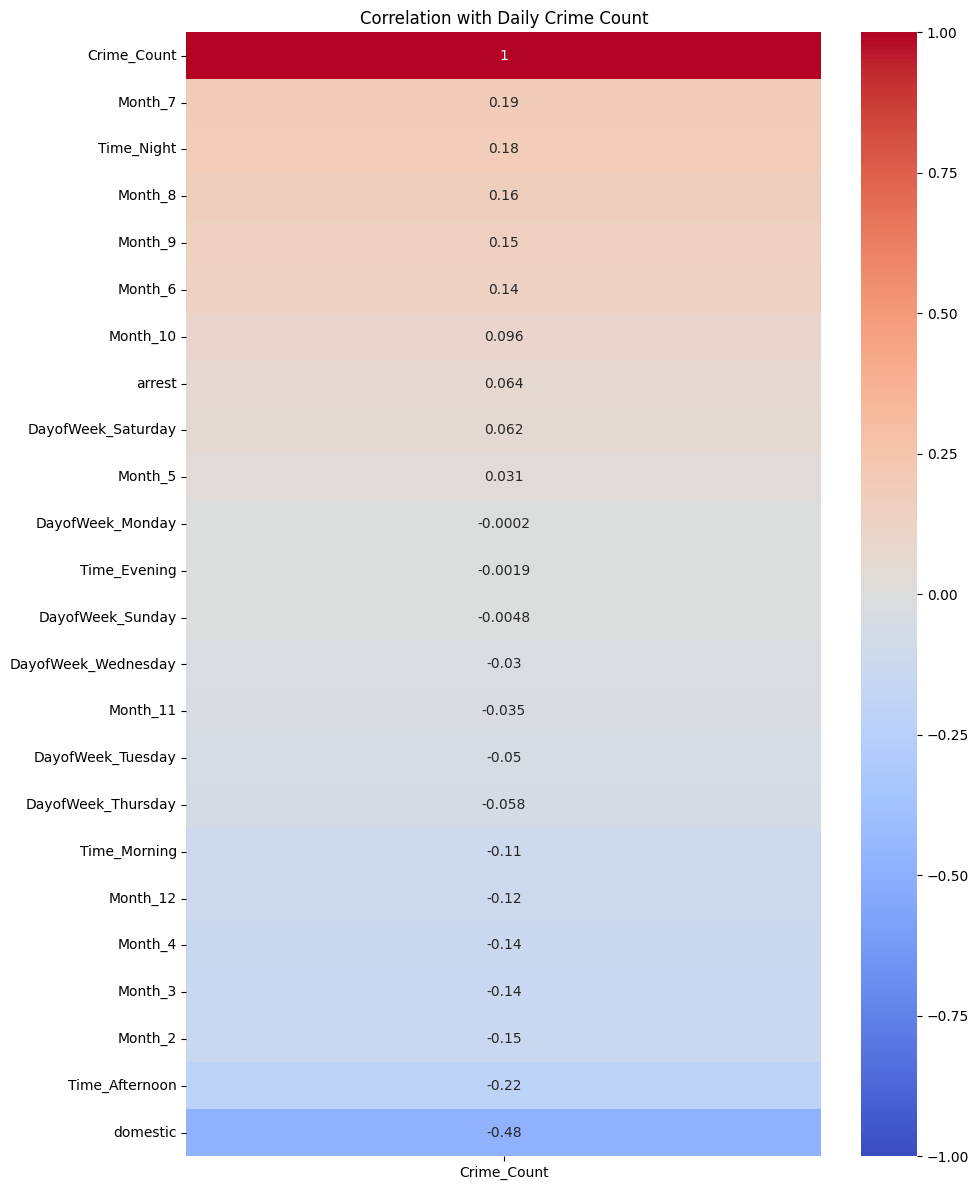

In [46]:
# Combine features and cleaned target into one DataFrame
daily_data = daily_exog.copy()
daily_data['Crime_Count'] = df.groupby('Crime_Date')['Crime_Count'].first()
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = daily_data.corr()

# Sort by Crime_Count correlation
sorted_corr = corr_matrix[['Crime_Count']].sort_values(by='Crime_Count', ascending=False)

# Plot heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(sorted_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation with Daily Crime Count')
plt.tight_layout()
plt.show()


**We select features that:**

Have a strong correlation with Crime_Count (threshold: |corr| > 0.10)

Are interpretable and actionable (i.e., they make sense for real-world forecasting)

**Selected Features + Justification:**

domestic (corr = -0.48)
-> Strong negative signal; days with more crimes tend to have a lower share of domestic cases

Time_Afternoon (corr = -0.22)
-> Crimes tend to be lower in the afternoon; may reflect behavioral patterns

Time_Night (corr = +0.18)
-> Crimes are higher during the night — well aligned with real-world crime reporting

Month_7, Month_8, Month_9 (corr ~= +0.15–0.19)
-> Summer months with increased outdoor activity lead to more crime

Month_2, Month_3, Month_4, Month_12 (corr ~= -0.12 to -0.15)
-> Winter months with lower crime levels — used for seasonal contrast

Optional (weaker but useful):

arrest (+0.06) –> low but acceptable; might help model overall enforcement level

DayofWeek_Saturday (+0.06) –> small weekend effect

**Excluded Features:**

Low correlation (|corr| < 0.05) like Wednesday, Monday, Evening, etc.

Redundant month dummies where only a few are enough to capture seasonality




In [47]:
# Set correlation threshold
threshold = 0.10

# Get absolute correlations with Crime_Count
corr_with_target = daily_data.corr()['Crime_Count'].drop('Crime_Count').abs()

# Select features with abs(corr) >= threshold
selected_features = corr_with_target[corr_with_target >= threshold].index.tolist()

# Filter the exogenous features
final_exog = daily_data[selected_features].copy()


In [48]:
train_data = daily_data[daily_data.index.year < 2025]
test_data = daily_data[daily_data.index.year == 2025]

# Split into target and exogenous variables
train_counts = train_data['Crime_Count']
test_counts = test_data['Crime_Count']

train_exog = train_data.drop(columns=['Crime_Count'])
test_exog = test_data.drop(columns=['Crime_Count'])

train_counts = train_counts.astype(float)
train_counts.index = pd.to_datetime(train_counts.index)
train_counts = train_counts.astype(float).fillna(method='bfill')

<ipython-input-48-3da5cae89371>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_counts = train_counts.astype(float).fillna(method='bfill')


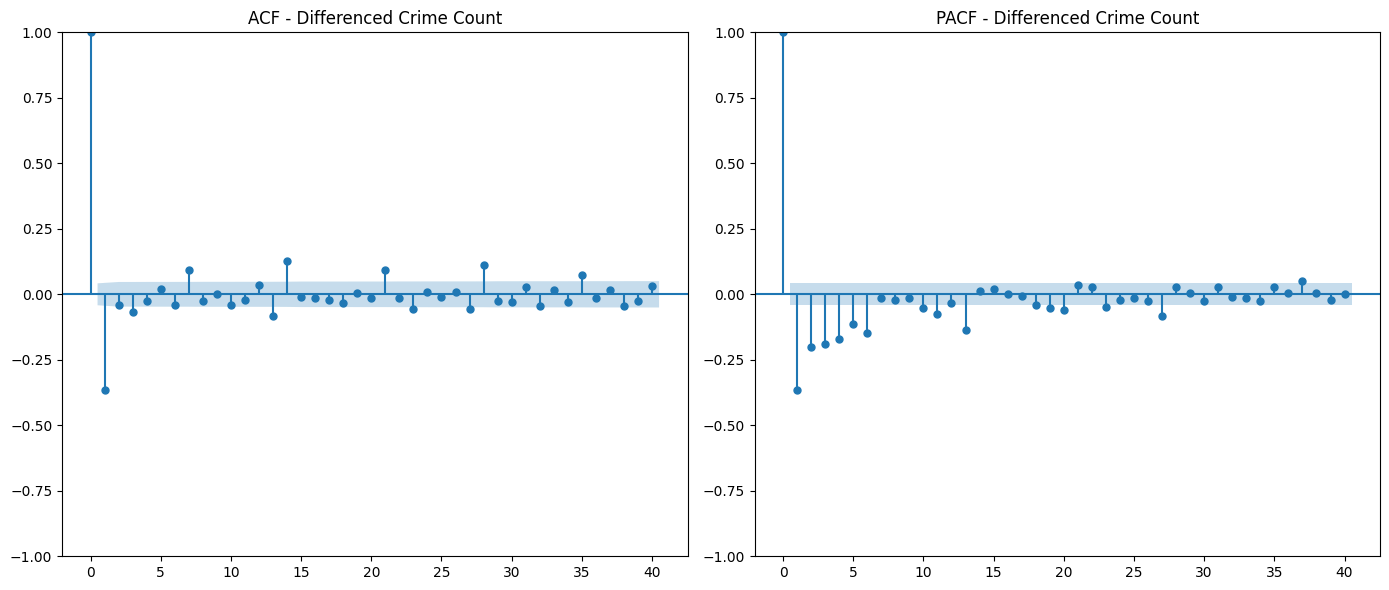

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF on differenced training data
diff_train_y = train_counts.diff().dropna()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(diff_train_y, ax=plt.gca(), lags=40)
plt.title('ACF - Differenced Crime Count')

plt.subplot(1, 2, 2)
plot_pacf(diff_train_y, ax=plt.gca(), lags=40, method='ywm')
plt.title('PACF - Differenced Crime Count')

plt.tight_layout()
plt.show()

**Observations:**

PACF has significant spikes up to lag 3.

-> So, p = 3 is a good starting choice.

ACF has significant spike at lag 1, minor ones at 2, 3.

-> So, q = 1 or 2 is reasonable.

Seasonal period (S):

Since we’re using a 28-day rolling average, and saw seasonality monthly (~28 days),

-> S = 28

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_exog = train_exog.astype(float).fillna(method='ffill').fillna(method='bfill')
test_exog = test_exog.astype(float).fillna(method='ffill').fillna(method='bfill')

model = SARIMAX(
    train_counts,
    exog=train_exog,
    order=(3, 1, 2),
    seasonal_order=(1, 1, 1, 28),
    enforce_stationarity=False,
    enforce_invertibility=False
)

model_fit = model.fit(disp=False)
print(model_fit.summary())

<ipython-input-50-a7e035f9ef4c>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_exog = train_exog.astype(float).fillna(method='ffill').fillna(method='bfill')
<ipython-input-50-a7e035f9ef4c>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_exog = test_exog.astype(float).fillna(method='ffill').fillna(method='bfill')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWa

                                      SARIMAX Results                                       
Dep. Variable:                          Crime_Count   No. Observations:                 2192
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 28)   Log Likelihood              -11366.854
Date:                              Sun, 20 Apr 2025   AIC                          22795.707
Time:                                      15:39:20   BIC                          22971.316
Sample:                                  01-01-2019   HQIC                         22859.979
                                       - 12-31-2024                                         
Covariance Type:                                opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
domestic             -474.0108     31.799    -14.906      0.000    -536.337    -

In [51]:
# Use full test set for 2025
forecast_result = model_fit.get_forecast(steps=len(test_exog), exog=test_exog)

# Get predictions and confidence intervals
forecast_values = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Align index with actual test dates (2025)
forecast_values.index = test_counts.index
forecast_ci.index = test_counts.index


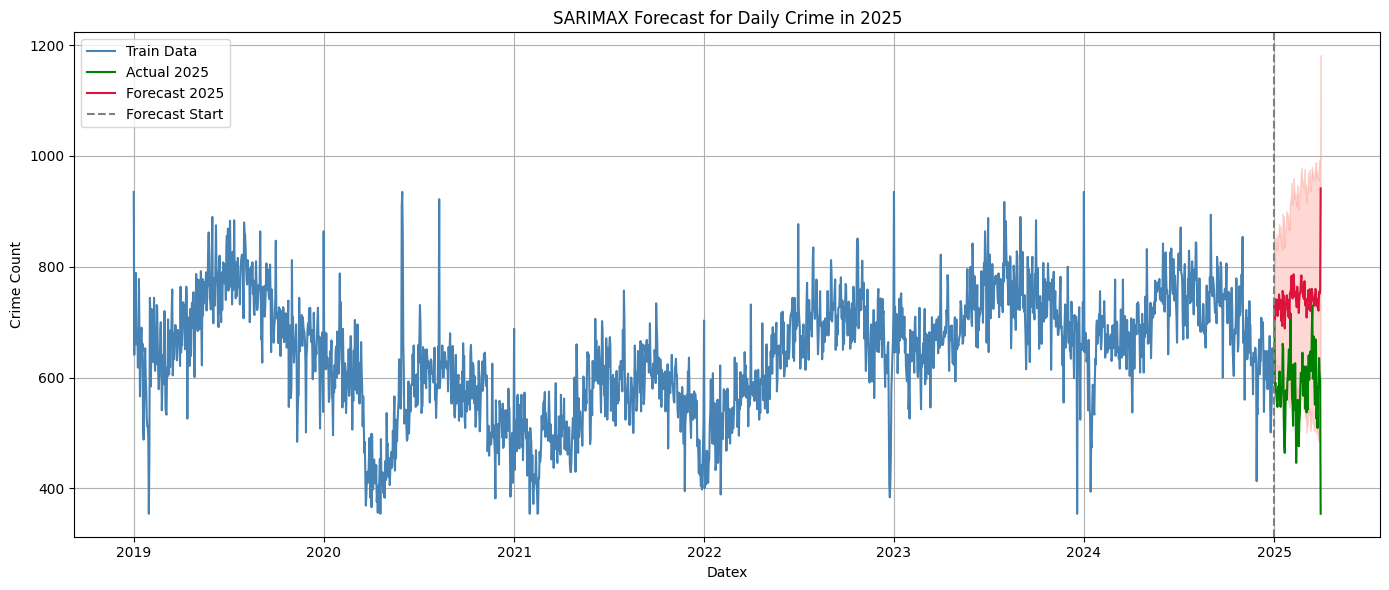

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train_counts, label='Train Data', color='steelblue')
plt.plot(test_counts, label='Actual 2025', color='green')
plt.plot(forecast_values, label='Forecast 2025', color='crimson')

# Add confidence interval
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='salmon', alpha=0.3)

plt.title("SARIMAX Forecast for Daily Crime in 2025")
plt.xlabel("Datex")
plt.ylabel("Crime Count")
plt.axvline(test_counts.index[0], color='gray', linestyle='--', label='Forecast Start')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Checking if forecast and actual values are aligned
assert len(forecast_values) == len(test_counts)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_counts, forecast_values))
print(f"SARIMAX Forecast RMSE for 2025: {rmse:.2f}")


SARIMAX Forecast RMSE for 2025: 173.65


###2. XGboost

While SARIMAX is effective at modeling long-term trends and capturing seasonality, it struggles to adapt to short-term fluctuations and irregular pattern. Our SARIMAX model yielded an RMSE of 173, indicating room for improvement.

To address this, we now introduce XGBoost, a tree-based ensemble model that can capture complex nonlinear interactions, short-term variations, and leverage multiple exogenous variables simultaneously. It complements SARIMAX by offering flexibility and performance in scenarios where temporal patterns alone are insufficient.

In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt

# Use clipped crime count and aligned exogenous features
data = final_exog.copy()  # this contains selected features + index as Crime_Date
data['Crime_Count'] = daily_counts_clipped  # ensure clipped target is used

# Reset index to get date features
data = data.reset_index()  # index = Crime_Date

# Add temporal features
data['Day'] = data['Crime_Date'].dt.day
data['Month'] = data['Crime_Date'].dt.month
data['DayofWeek'] = data['Crime_Date'].dt.dayofweek
data['WeekOfYear'] = data['Crime_Date'].dt.isocalendar().week

# Drop Crime_Date for modeling
data = data.drop(columns=['Crime_Date'])

# Define features and target
X = data.drop(columns=['Crime_Count'])
y = data['Crime_Count']

In [58]:
# First, reattach date to use for filtering
data['Crime_Date'] = daily_counts_clipped.index

# Rebuild X and y with engineered features
X = data.drop(columns=['Crime_Count'])
y = data['Crime_Count']

# Add lag features
for lag in [1, 2, 3, 7, 14, 28]:
    X[f'lag_{lag}'] = y.shift(lag)

# Add rolling window features
X['rolling_mean_28'] = y.shift(1).rolling(window=28).mean()
X['rolling_std_28'] = y.shift(1).rolling(window=28).std()

# Re-attach Crime_Date for filtering after adding lags/rolling
X['Crime_Date'] = data['Crime_Date']

# Drop rows with NaNs introduced by shifting
X = X.dropna()
y = y.loc[X.index]

X_train = X[X['Crime_Date'].dt.year < 2025].drop(columns=['Crime_Date'])
X_test = X[X['Crime_Date'].dt.year == 2025].drop(columns=['Crime_Date'])
y_train = y[X['Crime_Date'].dt.year < 2025]
y_test = y[X['Crime_Date'].dt.year == 2025]


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb

# Define hyperparameter space
param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# Initialize XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Randomized search with 3-fold CV
search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit the model
search.fit(X_train, y_train)

# Best model and predictions
print("Best parameters:", search.best_params_)
y_pred = search.predict(X_test)

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE on 2025 data: {rmse:.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
XGBoost RMSE on 2025 data: 66.26


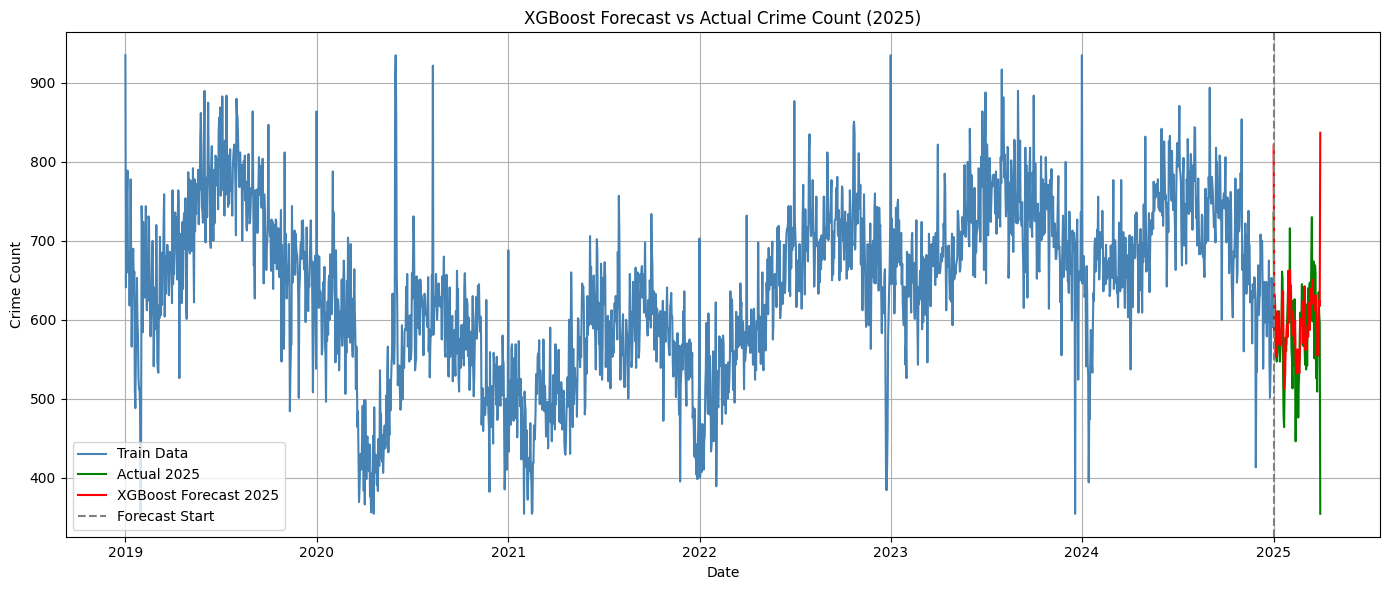

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Re-attach Crime_Date to X_test for plotting
X_test_plot = X.loc[X.index.isin(X_test.index)].copy()
X_test_plot['Crime_Date'] = daily_counts_clipped.index[X_test.index]

# Create prediction Series with proper datetime index
xgb_forecast = pd.Series(y_pred, index=X_test_plot['Crime_Date'])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train_counts, label='Train Data', color='steelblue')
plt.plot(test_counts, label='Actual 2025', color='green')
plt.plot(xgb_forecast, label='XGBoost Forecast 2025', color='red')

plt.title("XGBoost Forecast vs Actual Crime Count (2025)")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.axvline(test_counts.index[0], color='gray', linestyle='--', label='Forecast Start')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Observations:**

RMSE significantly improved to 66.26, a major drop from SARIMAX’s 173 which shows that XGBoost captured short-term fluctuations much better.

The red forecast line closely follows the green actual 2025 values, indicating strong predictive alignment.

XGBoost was especially effective at adjusting to daily spikes and dips in early 2025 that SARIMAX struggled with.

The model used lag and rolling features, which allowed it to learn from recent history more effectively than time-based seasonality alone.



## Hypothesis 2: DBSCAN Clustering

Criminal activity in Chicago exhibits spatial concentration rather than random distribution, forming distinct geographic clusters characterized by dominant crime types and localized behavioral patterns.

 Specifically, we will apply the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to uncover these clusters. DBSCAN is particularly well-suited for this task as it does not require prior knowledge of the number of clusters and is capable of identifying arbitrarily shaped clusters while also distinguishing noise or outliers. Through this method, we aim to discover meaningful patterns and subgroups within the data that may not be immediately apparent through traditional exploratory techniques.

**Tuning DBSCAN Parameters for Spatial Clustering**

we perform a fine grid search to find optimal values for eps (in kilometers) and min_samples for DBSCAN. This helps us identify the right density parameters that produce a reasonable number of clusters (around 300–400) while keeping noise points low. These tuned values will later be used for spatial crime hotspot detection.

100%|██████████| 16/16 [01:56<00:00,  7.29s/it]


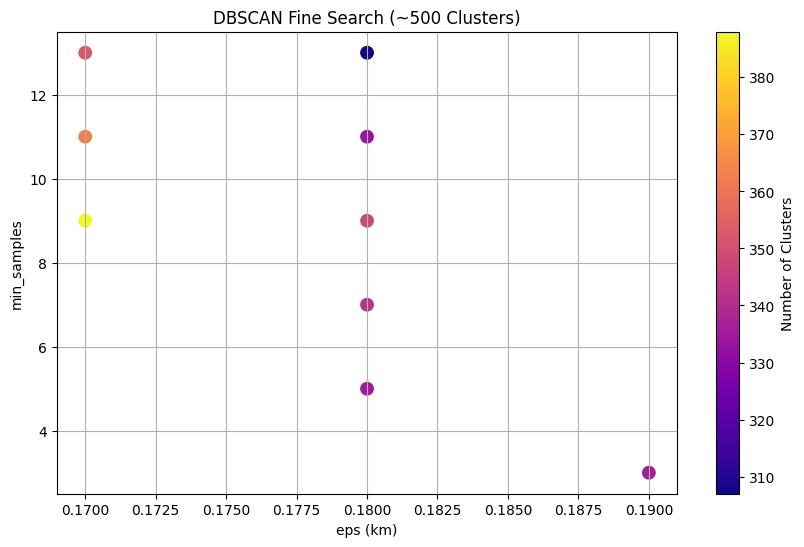

In [73]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from tqdm import tqdm

coords = crime_data[['latitude', 'longitude']].sample(n=50000, random_state=42).dropna()
radians_coords = np.radians(coords)

kms_per_radian = 6371.0088

results = []

results_fine = []

for eps_km in tqdm(np.arange(0.05, 0.2, 0.01)):  # Try 50m to 200m
    for min_samples in range(3, 15, 2):          # Try smaller min_samples
        eps_rad = eps_km / 6371.0088
        db = DBSCAN(eps=eps_rad, min_samples=min_samples, metric='haversine', algorithm='ball_tree')
        labels = db.fit_predict(radians_coords)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        total = len(labels)
        counts = pd.Series(labels).value_counts()
        max_cluster_size = counts[1:].max() if n_clusters > 0 else 0

        results_fine.append({
            'eps_km': round(eps_km, 3),
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'noise_pct': round(n_noise / total * 100, 2),
            'max_cluster_size': max_cluster_size
        })

grid_fine = pd.DataFrame(results_fine)

# Filter for ~500 clusters and low noise
targets = grid_fine[(grid_fine['n_clusters'] >= 300) &
                    (grid_fine['n_clusters'] <= 400) &
                    (grid_fine['noise_pct'] < 30)]

# Visualize
plt.figure(figsize=(10,6))
plt.scatter(targets['eps_km'], targets['min_samples'],
            c=targets['n_clusters'], cmap='plasma', s=80)
plt.colorbar(label='Number of Clusters')
plt.title('DBSCAN Fine Search (~500 Clusters)')
plt.xlabel('eps (km)')
plt.ylabel('min_samples')
plt.grid()
plt.show()



**DBSCAN Steps:**

1. Selected the most recent 50,000 crime records with valid latitude and longitude values.

2. Converted the coordinates to radians to accommodate the haversine distance metric, which is suitable for measuring great-circle distances between geographic points.

3. Set the eps parameter (maximum distance between two samples for them to be considered in the same neighborhood) based on a value in kilometers and converted it to radians using the Earth’s radius.

4. Used the ball_tree algorithm for efficient spatial indexing.

In [61]:
import numpy as np
from sklearn.cluster import DBSCAN

# Parameters from grid
eps_km = 0.17
min_samples = 10
best_eps = eps_km / 6371.0088

coords = crime_data.sort_values(by='date').dropna(subset=['latitude', 'longitude'])[['latitude', 'longitude']].tail(50000)
radians_coords = np.radians(coords)

db = DBSCAN(eps=best_eps, min_samples=min_samples, metric='haversine', algorithm='ball_tree')
labels = db.fit_predict(radians_coords)

# Final sample with labels
crime_sample = crime_data.loc[coords.index].copy()
crime_sample['Cluster_DBSCAN'] = labels


After applying DBSCAN, we assign a dominant crime type to each cluster by taking the statistical mode of crime categories within it. This helps characterize the nature of each spatial cluster. To prepare for visualization, we also define a color mapping for key crime types, with a default gray color for any unlisted categories.

In [78]:
top_crimes_per_cluster = crime_sample.groupby('Cluster_DBSCAN')['primary_type'].agg(lambda x: x.mode()[0])

crime_colors = {
    'theft': 'blue',
    'battery': 'purple',
    'assault': 'orange',
    'narcotics': 'green',
    'robbery': 'yellow',
    'criminal damage': 'black',
    'motor vehicle theft': 'cyan',
    'homicide': 'darkred'
}


# Default color for unlisted crime types
default_color = 'gray'

**Visualizing Crime Hotspots on an Interactive Map**

We now visualize the results of our DBSCAN clustering on an interactive Folium map of Chicago:

1. Each circle represents a crime cluster, positioned at the mean latitude and longitude of incidents in that cluster.

2. The size of the circle is proportional to the number of crimes in the cluster, capped to avoid overly large markers.

3. The color reflects the most common crime type within each cluster using a predefined color scheme.

4. A legend is included to explain color mappings for interpretability.

This map helps visually identify and understand spatial concentrations of different types of crime across the city.

In [80]:
import folium

# Create a new map centered on Chicago
crime_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Group clusters again
clusters = crime_sample.groupby('Cluster_DBSCAN').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'Cluster_DBSCAN': 'count'
}).rename(columns={'Cluster_DBSCAN': 'Crime_Count'}).reset_index()

# Remove noise
crime_sample = crime_sample[crime_sample['Cluster_DBSCAN'] != 0]

# Draw each cluster on the map
max_radius = 1000
for _, row in clusters.iterrows():
    radius = min(row['Crime_Count'] * 10, max_radius)
    crime_type = top_crimes_per_cluster[row['Cluster_DBSCAN']].lower()
    circle_color = crime_colors.get(crime_type, default_color)

    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        popup=f"Crime Hotspot: {row['Crime_Count']} incidents\nMost Common: {crime_type.title()}",
        color=circle_color,
        fill=True,
        fill_opacity=0.3
    ).add_to(crime_map)

legend_html = """
<div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 220px; height: auto;
    z-index:9999; font-size:14px;
    background-color: white;
    border:2px solid grey;
    padding: 10px;
    border-radius: 6px;
    box-shadow: 2px 2px 5px rgba(0,0,0,0.3);
">
<b>Crime Type Legend</b><br>
<span style="color:blue">&#9679;</span> Theft<br>
<span style="color:purple">&#9679;</span> Battery<br>
<span style="color:orange">&#9679;</span> Assault<br>
<span style="color:green">&#9679;</span> Narcotics<br>
<span style="color:yellow">&#9679;</span> Robbery<br>
<span style="color:black">&#9679;</span> Criminal Damage<br>
<span style="color:cyan">&#9679;</span> Motor Vehicle Theft<br>
<span style="color:darkred">&#9679;</span> Homicide<br>
<span style="color:gray">&#9679;</span> Other
</div>
"""

crime_map.get_root().html.add_child(folium.Element(legend_html))

crime_map.save('crime_hotspots_dbscan.html')